### Standardization
* Mean Centering by transforming by this formula . Xi = ( Xi - Xmean )/ std
* scaling by the factor of standard deviation
* Setting mean to 0 and standard deviation as 1 .
* It is recommended that before standardization we must do train_test_split first .
* Scaling does not change the shape of distribution .
* Impact of outliers are not reduced .
#### Scaling are used in algorithms like : 
* K-Means
* K-Nearest-Neighbours
* Principal Component Analysis ( PCA )
* Artificial Neural Networks
* Gradient Descent

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv('E:/csvfiles/Social_Network_Advertisement.csv')

In [8]:
df = df.iloc[:,2:]

In [9]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [11]:
# Train test Split
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop('Purchased',axis=1),
                                                      df['Purchased'],
                                                      test_size=0.3,
                                                      random_state=0)
x_train.shape , x_test.shape

((280, 2), (120, 2))

### StandardScaler Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set , it will learn the parameters
scaler.fit(x_train)

# transforming the train and test datasets or we can say that we are applying scaling to both of them .
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
scaler.mean_  # the two parameters here are the mean of age and salary

array([3.78642857e+01, 6.98071429e+04])

In [16]:
# scaling converts our dataframe into a numpy array so we are again making it a dataframe .

x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns=x_test.columns)

### Comparing the original dataframe and the scaled dataframe to look for the changes in the values 

In [18]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [19]:
np.round(x_train_scaled.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Let us now visualize the impact of scaling .

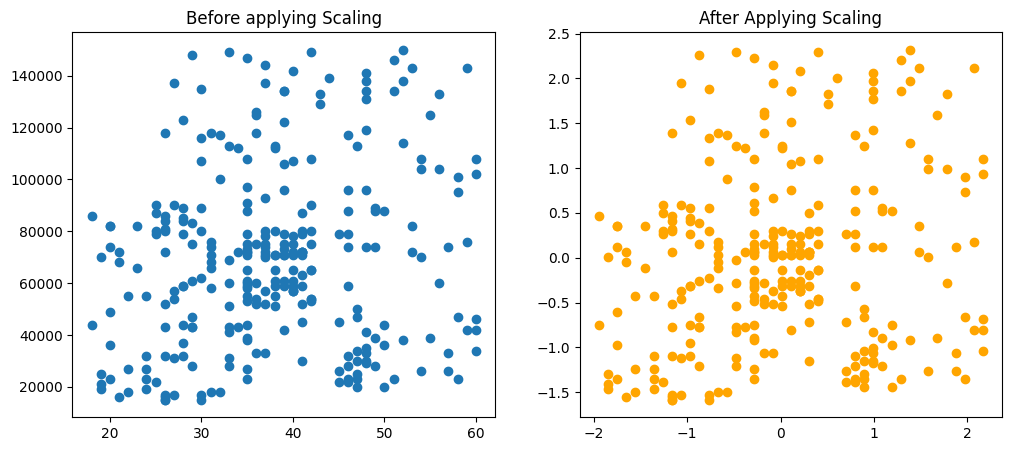

In [23]:
fig , (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(x_train['Age'] , x_train['EstimatedSalary'])
ax1.set_title('Before applying Scaling')
ax2.scatter(x_train_scaled['Age'] , x_train_scaled['EstimatedSalary'],color='orange')
ax2.set_title("After Applying Scaling")
plt.show()

<AxesSubplot: title={'center': 'After applying scaling'}, xlabel='Age', ylabel='Density'>

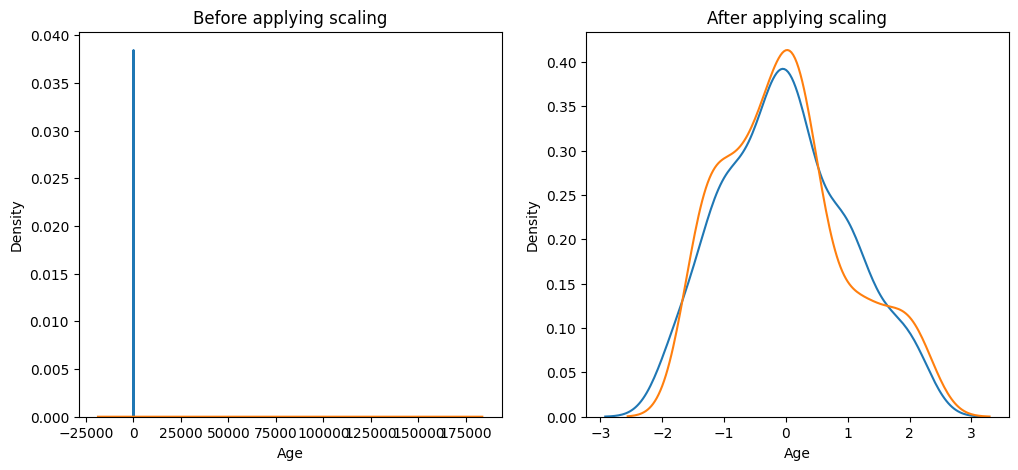

In [25]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize = (12,5))

# before scaling 
ax1.set_title('Before applying scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'] , ax=ax1)

# after scaling 
ax2.set_title('After applying scaling')
sns.kdeplot(x_train_scaled['Age'] , ax= ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

#### Initially all the values we contrained to a very small range and after scaling we get a bit normally distributed range which is a good result in Statistics .